In [35]:
from datetime import datetime

import pandas as pd
from energy_box_control.power_hub.control import control_power_hub, initial_control_state, no_control
from energy_box_control.power_hub.network import PowerHub, PowerHubSchedules
from energy_box_control.schedules import ConstSchedule

import matplotlib.pylab as plt

%load_ext autoreload 
%autoreload 2

results = {} 
steps = 5000
schedules = PowerHubSchedules(global_irradiance_schedule=ConstSchedule(800), cooling_demand_schedule = ConstSchedule(100/24/60/60))
power_hub = PowerHub.power_hub(schedules)

control_state = initial_control_state()

state = power_hub.simple_initial_state(datetime.now())
control_values = no_control(power_hub)
power_hub_sensors = power_hub.sensors_from_state(state)

for _ in range(steps):
    state = power_hub.simulate(state, control_values)
    sensors = power_hub.sensors_from_state(state)
    #control_state, control_values = control_power_hub(power_hub, control_state, sensors, state.time)
    control_values = no_control(power_hub)

    results[state.time.timestamp] = pd.DataFrame(sensors.to_dict()).T.stack()

data = pd.DataFrame(results).T[1::]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
sensors.to_dict()

NameError: name 'HotSwitchSensors' is not defined

In [36]:
# fix typing of sensors to_dict 
# remove sensor context - add weather to to_dict and the SensorEncoder 
# make list of relevant sensor variables
# make Control encoder 
appliances = ["heat_pipes", "hot_reservoir", "pcm", "yazaki"]#, "chiller", "preheat_reservoir", "outboard_exchange"]
temperatures = [(appliance,var) for appliance, var in data.columns if 'temperature' in var and appliance in appliances]
powers = [(appliance,var) for appliance, var in data.columns if 'power' in var and appliance in appliances]

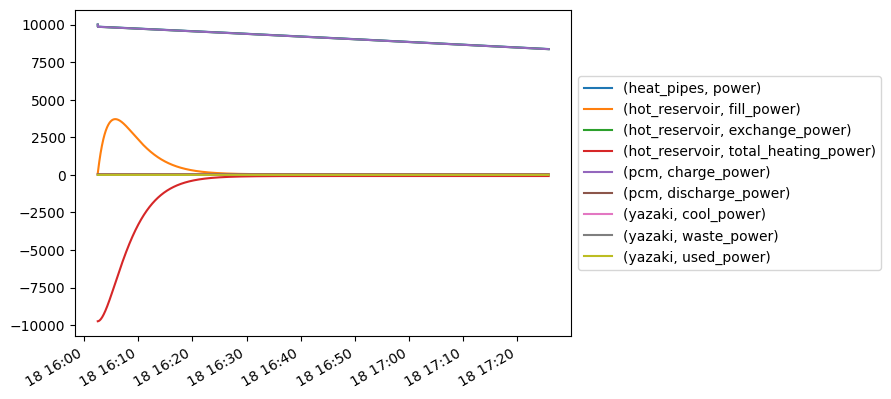

In [37]:
data[powers].plot()
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

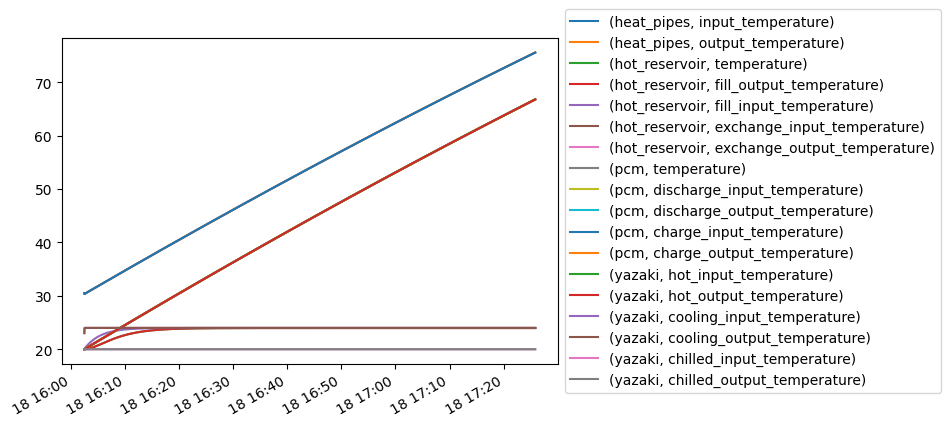

In [38]:
data[temperatures].plot()
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))